# LAB 3 - Image Filtering (1)

**Objectives:**

* Use Look-Up Tables to perform image equalization & auto-levels
* Understand kernel convolution & rank filters
* Use & understand the 2D Fourier transform

## Equalization & auto-levels

Create a look-up table to "stretch" the histogram so that :
* $I_{new}(x,y) = \frac{255}{T}I(x,y)$, if $I(x,y) <= T$
* $I_{new}(x,y) = 255$, otherwise

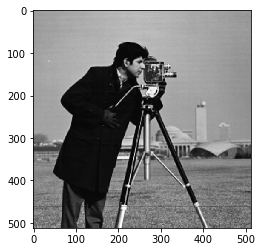

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera

# Test image provided by the skimage library
im = camera()

plt.figure()
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255) # Use the "grayscale" colormap to display the image correctly
plt.show()

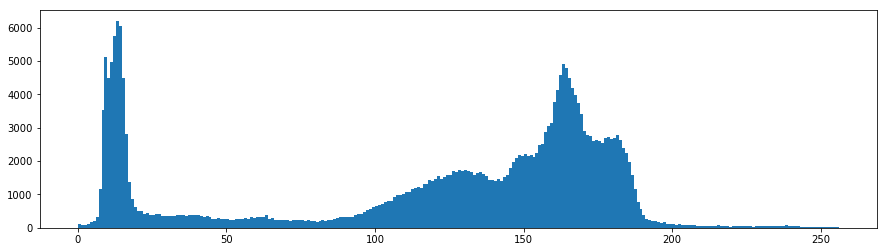

In [2]:
bins = np.arange(257)
plt.figure(figsize=(15,4))
plt.hist(im.flatten(), bins=bins)
plt.show()

In [3]:

# -- Your code here -- #


Create a look-up table to perform an **equalization** of the cameraman image (so that the histogram becomes "as flat as possible")

In [4]:

# -- Your code here -- #


## Kernel convolution

Write a program that apply a 3x3 mean kernel convolution on the cameraman image

In [5]:
from skimage.data import camera

im = camera()

## -- Your code here -- ##


Starting from the following example:

1. Compare the mean filter and the median filter effect on the image (same radius)
1. Show how the median filter filters noise without smoothing image borders. How does the radius influence the results?

(512, 512) 0.0 1.0


C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


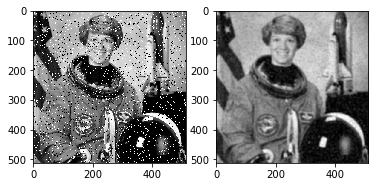

In [6]:
import skimage.filters.rank as skr
from skimage.data import astronaut
from skimage.morphology import disk
from skimage.color import rgb2gray

# example code to add salt and pepper noise to an image
ima = rgb2gray(astronaut())
print(ima.shape, ima.min(), ima.max()) # Note that rgb2gray also changes the image from 8-bit integer to floats
n = np.random.random(ima.shape)

ima[n<.05] = 0. # set 5% of the pixels to 0 = black
ima[n>.95] = 1. # set 5% other pixels to 1 = white

plt.subplot(1,2,1)
plt.imshow(ima,cmap=plt.cm.gray);
plt.subplot(1,2,2)
plt.imshow(skr.mean(ima,disk(4)),cmap=plt.cm.gray);

In [7]:

## -- Your code here -- ##


## 2D Fourier transform

Starting from the example below:

1. Use Fourier transform to reduce the dithering of the *moire.png* image by building a low-pass filter.
1. Build a high-pass filter using Fourier transform and apply the filter to the cameraman image.
1. Compute an enhanced version of the image using:
$$ I_{enh} = I_{orig} + \alpha \, I_{highpass}$$

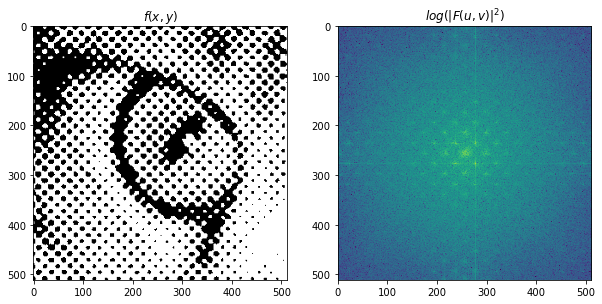

In [8]:
%matplotlib inline
from skimage.io import imread
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt

im = imread('http://homepages.ulb.ac.be/~odebeir/data/moire1.png').astype(np.float)
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

power = np.abs(f)**2

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(power))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.show()

In [9]:

## -- Your code here -- ##
